# **TC2-DS- Experiment 2**

*    **SIA VASHIST**
*    PRN: 20190802107

---



# **AIM -** Consider two data sets given i.e. *Customer Behavior* and *House Price Prediction*.

> **<u>QUESTION:</u>** 

>Find Bivariate Association between numeric variables using Covariance and Simple Correlation for the given “House Price Prediction” Data set. Represent the results of covariance and correlation into n*n matrices. Where n is the number of numeric variables.


---




#  **LIBRARIES USED:**

> PANDAS

---




* **THEORY:**

> **<u>What is Covariance?</u>**

> Covariance explains how two variables are related to one another. Covariance, in more technical terms, is a measure of how two random variables in a data collection will change together. If the covariance is positive, the variables are directly related or directly proportional, while a negative covariance indicates an indirect relation or an inverse relation.

> ***Covariance is given by:***

>>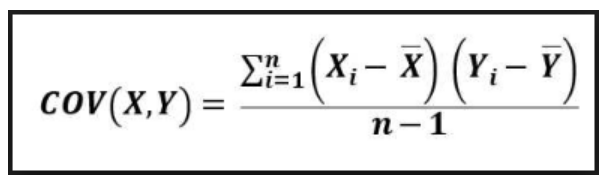

>  **<u>What is Correlation?</u>**

> Correlation is a statistical method that can be used to demonstrate a connection or relationship between two or more variables. The basic idea behind it is that whenever the value of one variable changes, the other variable also does (decreases or increases).


---





#  **FINDING:**

Bivariate Association of Numeric Variables Using Covariance and Simple Correlation for the given "House Price Prediction" Data Set



In [3]:
#importing pandas and loading the given csv file.
import io
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
from google.colab import files
uploaded = files.upload()

Saving kc_house_data.csv to kc_house_data.csv


In [5]:
Dataset_df = pd.read_csv(io.BytesIO(uploaded["kc_house_data.csv"]))
print("The Dataset is as Follows:")
print(Dataset_df.dropna(), '\n')

The Dataset is as Follows:
               id     price  sqft_living  floors  zipcode
0      7129300520  221900.0         1180     1.0    98178
1      6414100192  538000.0         2570     2.0    98125
2      5631500400  180000.0          770     1.0    98028
3      2487200875  604000.0         1960     1.0    98136
4      1954400510  510000.0         1680     1.0    98074
...           ...       ...          ...     ...      ...
21608   263000018  360000.0         1530     3.0    98103
21609  6600060120  400000.0         2310     2.0    98146
21610  1523300141  402101.0         1020     2.0    98144
21611   291310100  400000.0         1600     2.0    98027
21612  1523300157  325000.0         1020     2.0    98144

[21613 rows x 5 columns] 



In [6]:
#Removing redundant columns (user id, gender, purchased)
new_df = Dataset_df.drop(labels=["id","floors","zipcode"], axis = 1)
new_df

,price,sqft_living
0,221900.0,1180
1,538000.0,2570
2,180000.0,770
3,604000.0,1960
4,510000.0,1680
...,...,...
21608,360000.0,1530
21609,400000.0,2310
21610,402101.0,1020
21611,400000.0,1600


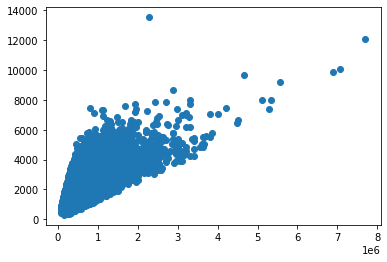

In [7]:
plt.scatter(new_df['price'],new_df['sqft_living'])
plt.show()

>We can see that by simply observing the plot, it is quite obvious to determine whether the bivariate connection between the price and sqft_living variables is positive, significant, and linear. However, we'll apply mathematics to prove the same. Consequently, we can define the same using simple correlation and covariance.







#    Calculating Covariance



In [16]:
#Length Function
def get_length(g):
  l = 0
  for i in new_df[g]:
    l += 1
  return l

In [17]:
#Mean Function
def mean(g):
  a = new_df[g]
  s = 0
  l = 0
  for i in a:
    s += i
    l += 1
  return (s/l)

In [18]:
#Sigma Function
def sigmaXY(x,y):
  a = new_df[x]
  b = new_df[y]
  s = 0
  for i in range (get_length(x)):
    s += a[i]*b[i]
  return s

In [19]:
#Covariance Function
def covariance(x,y):
  a = new_df[x]
  l = len(a-1)
  a_mean = mean(x)
  b = new_df[y]
  b_mean = mean(y)
  r = []

  for i in range(len(a)):
    k = a[i] - a_mean
    t = b[i] - b_mean
    g = k*t
    r.append(g)
  return (sum (r)/l)


In [24]:
covariance("price","sqft_living")
#This implies that the relationship is at least kind of positive. 

236858941.30597872

#    Calculating Correlation

In [21]:
#Correlation Function
def correlation(x, y):
  c = covariance(x,y)
  p = (new_df[x].var())**0.5
  q = (new_df[y].var())**0.5
  r = p*q
  return(c/r)

In [22]:
correlation("price","sqft_living")

0.7020112387580352

*   The covariance coefficient (correlation) is 0.7020. 
* As a result, we can say that the two variables (Price and Sqft Living) in this case are very closely related and have a linear relationship.

 The closer the value is to 1, the stronger and more positively linear the relationship between the variables is, and the closer it is to 0, the relationship is not linear and very weak.
* This is also evident in the scatter plot of both variables. 

In [25]:
new_df.corr()

,price,sqft_living
price,1.000000,0.702044
sqft_living,0.702044,1.000000


# **Conclusion:**
# Hence, this concludes that the bivariate relationship between variables "price" and "sqft living" is positive, strong, and linear.

---